In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [90]:
output_dir = 'plots_teoria'

# Capítulo 1: Problema

## 1.1. Introducción

In [91]:
train_size = 100
population_size = train_size + 40
population_config = {
    'n_samples': population_size,
    'class_sep': 0.2,
    'n_classes': 2,
    'n_features': 3,
    'n_informative': 2,
    'n_redundant': 0,
    'n_repeated': 0,
}
random_state = 42
np.random.seed(random_state)
num_wrong_predictions = 5

In [92]:
X, y = make_classification(
    **population_config,
    weights=None,
    random_state=random_state,
)

In [93]:
prev_test = 0.9

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
idx_positives_test = np.argwhere(y_test==1).flatten()
idx_negatives_test = np.random.choice(
    np.argwhere(y_test==0).flatten(),
    size=round((1-prev_test)*len(idx_positives_test)/prev_test),
    replace=False,
)
idx_test = np.concatenate([idx_positives_test, idx_negatives_test])
X_test = X_test[idx_test]
y_test = y_test[idx_test]

In [94]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [95]:
y_predict_train = model.predict(X_train)
positive_predictions_train = (y_predict_train==1)

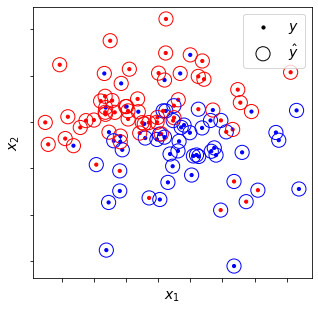

In [96]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

ground_truth_colors_train = np.where(y_train, 'r', 'b')
ground_truth_points_train = ax.scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=40,
    c=ground_truth_colors_train,
    marker='.',
)
prediction_colors_test = np.where(y_predict_train, 'r', 'b')
prediction_circles_test = ax.scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=200,
    marker='o',
    facecolors='None',
    edgecolors=prediction_colors_test,
)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel(r'$x_{1}$', fontsize=fontsize)
plt.ylabel(r'$x_{2}$', fontsize=fontsize)
ax.legend(
    [ground_truth_points_train, prediction_circles_test],
    [r'$y$', r'$\hat y$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.savefig(f'{output_dir}/intro_scatterplot.png')
plt.show()

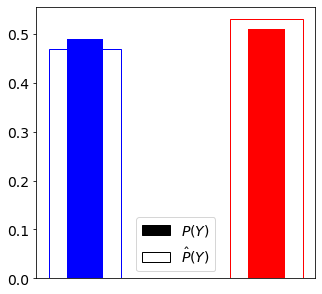

In [97]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

unique, y_train_counts = np.unique(y_train, return_counts=True)
_, y_train_predict_counts = np.unique(y_predict_train, return_counts=True)

ax.xaxis.set_visible(False)
colors = ['blue', 'red']
ground_truth_bar = ax.bar(
    unique,
    y_train_counts/len(y_train),
    color=colors,
    width=0.2,
)
predictions_bar = ax.bar(
    unique,
    y_train_predict_counts/len(y_train),
    edgecolor=colors,
    width=0.4, 
    fill=False,
)
ax.legend(
    [ground_truth_bar, predictions_bar],
    [r'$P(Y)$', r'$\hat P(Y)$'],
    fontsize=fontsize,
    loc='best',
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.yticks(fontsize=fontsize)
plt.savefig(f'{output_dir}/intro_barplot.png')
plt.show()

## 1.4. Cambios en las distribuciones de los datos

In [98]:
y_predict_test = model.predict(X_test)
positive_predictions_test = (y_predict_test==1)

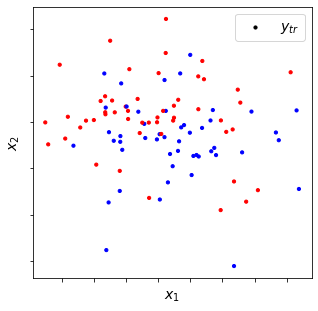

In [99]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

ground_truth_colors_train = np.where(y_train, 'r', 'b')
ground_truth_points_train = ax.scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=40,
    c=ground_truth_colors_train,
    marker='.',
)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel(r'$x_{1}$', fontsize=fontsize)
plt.ylabel(r'$x_{2}$', fontsize=fontsize)
ax.legend(
    [ground_truth_points_train],
    [r'$y_{tr}$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
plt.savefig(f'{output_dir}/cambios_train_scatterplot.png')
plt.show()

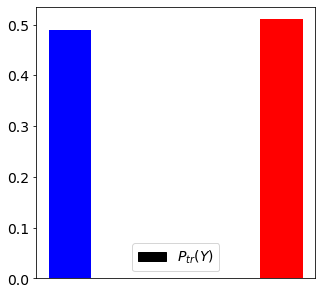

In [100]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

unique, y_counts_train = np.unique(y_train, return_counts=True)

ax.xaxis.set_visible(False)
colors = ['blue', 'red']
ground_truth_bar = ax.bar(
    unique,
    y_counts_train/len(y_train),
    color=colors,
    width=0.2,
)
ax.legend(
    [ground_truth_bar],
    [r'$P_{tr}(Y)$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
plt.yticks(fontsize=fontsize)
plt.savefig(f'{output_dir}/cambios_train_barplot.png')
plt.show()

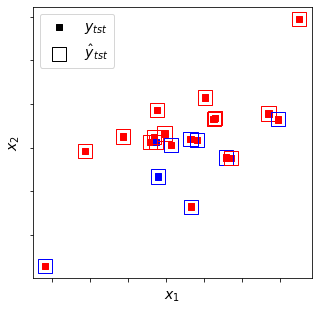

In [101]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

ground_truth_colors_test = np.where(y_test, 'r', 'b')
ground_truth_points_test = ax.scatter(
    x=X_test[:, 0],
    y=X_test[:, 1],
    s=40,
    c=ground_truth_colors_test,
    marker='s',
)
prediction_colors_test = np.where(y_predict_test, 'r', 'b')
predictions_squares_test = ax.scatter(
    x=X_test[:, 0],
    y=X_test[:, 1],
    s=200,
    marker='s',
    facecolors='None',
    edgecolors=prediction_colors_test,
)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel(r'$x_{1}$', fontsize=fontsize)
plt.ylabel(r'$x_{2}$', fontsize=fontsize)
ax.legend(
    [ground_truth_points_test, predictions_squares_test],
    [r'$y_{tst}$', r'$\hat y_{tst}$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.savefig(f'{output_dir}/cambios_test_scatterplot.png')
plt.show()

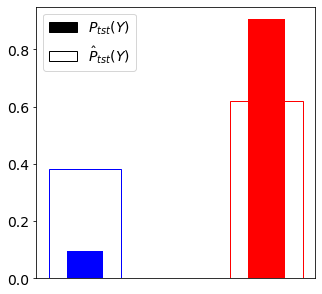

In [102]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

_, y_counts_test = np.unique(y_test, return_counts=True)
_, y_counts_predict_test = np.unique(y_predict_test, return_counts=True)

ax.xaxis.set_visible(False)
colors = ['blue', 'red']
ground_truth_bar = ax.bar(
    unique,
    y_counts_test/len(y_test),
    color=colors,
    width=0.2,
)
predictions_bar = ax.bar(
    unique,
    y_counts_predict_test/len(y_test),
    edgecolor=colors,
    width=0.4, 
    fill=False,
)
ax.legend(
    [ground_truth_bar, predictions_bar],
    [r'$P_{tst}(Y)$', r'$\hat P_{tst}(Y)$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.yticks(fontsize=fontsize)
plt.savefig(f'{output_dir}/cambios_test_barplot.png')
plt.show()

## 1.5. El problema de clasificar y contar

In [103]:
p_vals = np.round(np.arange(0, 1.05, 0.05), 2)
tpr_vals = np.round(np.arange(0.6, 1.01, 0.2), 1)
fpr_vals = np.round(np.arange(0, 0.41, 0.2), 1)

In [104]:
# Compute the formula for all possible combinations using broadcasting
p_hat_vals = (
    p_vals[:, np.newaxis, np.newaxis] * tpr_vals[np.newaxis, :, np.newaxis] +
    (1-p_vals[:, np.newaxis, np.newaxis])*fpr_vals[np.newaxis, np.newaxis, :]
)

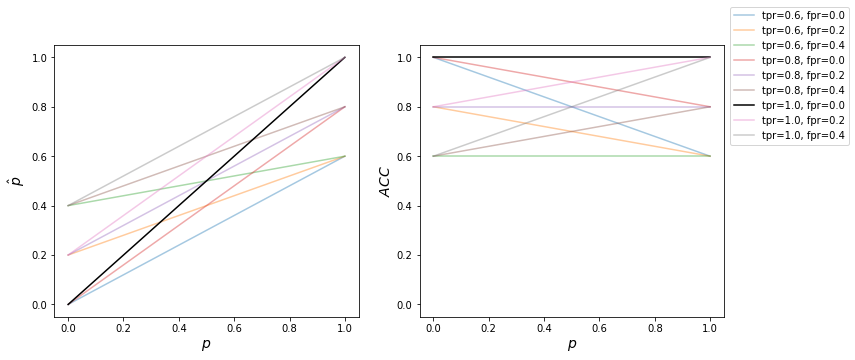

In [105]:
import matplotlib.ticker as plticker

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(12, 5)
fontsize = 14
default_alpha = 0.4
loc = plticker.MultipleLocator(base=0.1)

for i in range(0, len(tpr_vals)):
    for j in range(0, len(fpr_vals)):
        alpha = default_alpha
        color = None
        if tpr_vals[i]==1 and fpr_vals[j]==0:
            alpha = 1
            color = 'black'
        ax1.plot(
            p_vals,
            p_hat_vals[:, i, j],
            label=f'tpr={tpr_vals[i]:.1f}, fpr={fpr_vals[j]:.1f}',
            alpha=alpha,
            color=color,
        )
ax1.set_xlabel(r'$p$', fontsize = fontsize)
ax1.set_ylabel(r'$\hat p$', fontsize = fontsize)

for i in range(0, len(tpr_vals)):
    for j in range(0, len(fpr_vals)):
        alpha = default_alpha
        color = None
        if tpr_vals[i]==1 and fpr_vals[j]==0:
            alpha = 1
            color = 'black'
        ax2.plot(
            p_vals,
            (tpr_vals[i]*p_vals)+(1-fpr_vals[j])*(1-p_vals),
            label=f'tpr={tpr_vals[i]:.1f}, fpr={fpr_vals[j]:.1f}',
            alpha=alpha,
            color=color,
        )
ax2.set_xlabel(r'$p$', fontsize = fontsize)
ax2.set_ylabel(r'$ACC$', fontsize = fontsize)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, bbox_to_anchor=(1.05, 1))
plt.savefig(f'{output_dir}/cc_tpr_fpr.png', bbox_inches='tight')
plt.show()

# Capítulo 2: Estimación Puntual

In [106]:
#CC:
hat_p_cc = y_counts_predict_test[1]/len(y_test)
{
    'frac': f"{y_counts_predict_test[1]}/{len(y_test)}",
    'val': hat_p_cc,
}

{'frac': '13/21', 'val': 0.6190476190476191}

In [110]:
#ACC_
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_test).ravel()
print({
    "tn": tn,
    "fp": fp,
    "fn": fn,
    "tp": tp,
})
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)
{
    "fpr": fpr,
    "tpr": tpr,
    "val": (hat_p_cc-fpr)/(tpr-fpr)
}

{'tn': 1, 'fp': 1, 'fn': 7, 'tp': 12}


{'fpr': 0.5, 'tpr': 0.631578947368421, 'val': 0.9047619047619052}

In [139]:
#PCC
y_predict_proba_test = model.predict_proba(X_test)
s = pd.DataFrame(y_predict_proba_test).transpose()
print(s.to_latex(
    header=False,
    bold_rows=True,
    float_format="%.2f",
))
hat_p_pcc = y_predict_proba_test[:, 1].sum()/len(y_test)
hat_p_pcc

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrr}
\toprule
\textbf{0} & 0.24 & 0.40 & 0.76 & 0.81 & 0.47 & 0.47 & 0.01 & 0.34 & 0.28 & 0.40 & 0.47 & 0.41 & 0.53 & 0.53 & 0.51 & 0.54 & 0.40 & 0.48 & 0.54 & 0.47 & 0.62 \\
\textbf{1} & 0.76 & 0.60 & 0.24 & 0.19 & 0.53 & 0.53 & 0.99 & 0.66 & 0.72 & 0.60 & 0.53 & 0.59 & 0.47 & 0.47 & 0.49 & 0.46 & 0.60 & 0.52 & 0.46 & 0.53 & 0.38 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_59417/10312986.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(s.to_latex(


0.539574959352956

In [140]:
#PACC
s = pd.DataFrame({
    "h(x)=0": y_predict_proba_test[:, 0],
    "h(x)=1": y_predict_proba_test[:, 1],
    "y": y_test,
})
print(s.to_latex(
    index=False,
    float_format="%.2f",
))
tppa = y_predict_proba_test[y_test==1, 1].sum()/(y_test==1).sum()
fppa = y_predict_proba_test[y_test==0, 1].sum()/(y_test==0).sum()
{
    "tppa": tppa,
    "fppa": fppa,
    "val": (hat_p_pcc-fppa)/(tppa-fppa)
}

\begin{tabular}{rrr}
\toprule
 h(x)=0 &  h(x)=1 &  y \\
\midrule
   0.24 &    0.76 &  1 \\
   0.40 &    0.60 &  1 \\
   0.76 &    0.24 &  1 \\
   0.81 &    0.19 &  1 \\
   0.47 &    0.53 &  1 \\
   0.47 &    0.53 &  1 \\
   0.01 &    0.99 &  1 \\
   0.34 &    0.66 &  1 \\
   0.28 &    0.72 &  1 \\
   0.40 &    0.60 &  1 \\
   0.47 &    0.53 &  1 \\
   0.41 &    0.59 &  1 \\
   0.53 &    0.47 &  1 \\
   0.53 &    0.47 &  1 \\
   0.51 &    0.49 &  1 \\
   0.54 &    0.46 &  1 \\
   0.40 &    0.60 &  1 \\
   0.48 &    0.52 &  1 \\
   0.54 &    0.46 &  1 \\
   0.47 &    0.53 &  0 \\
   0.62 &    0.38 &  0 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_59417/2501748273.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(s.to_latex(


{'tppa': 0.5482994916494848,
 'fppa': 0.4566919025359315,
 'val': 0.9047619047619055}